In [125]:
!pip install nltk --trusted-host pypi.org --trusted-host files.pythonhosted.org

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 640.0 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 1.7 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.5 MB 2.8 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 2.9 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 2.5 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.5 MB 2.0 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.5 MB 2.0 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.5 MB 2.0 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.5 MB 2.0 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 1.6 MB/s eta 0:00:01
   --------------

## **Notebook Imports**

In [136]:
from os import walk
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
%matplotlib inline

ModuleNotFoundError: No module named 'nltk'

**Constants**

In [90]:
Example_File = 'SpamData/01_Processing/practice_email.txt'
Spam_1_Path = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
Spam_2_Path = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'
Easy_Nonspam_1_path = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
Easy_Nonspam_2_path = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'
Spam_Cat = 1
Ham_cat = 0
Data_JSON_File = 'SpamData/01_Processing/email-text-data.json'

**Reading File**

In [3]:
Stream = open(Example_File,encoding='latin-1')
Message= Stream.read()
Stream.close()
print(Message)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

In [4]:
import sys
sys.getfilesystemencoding()

'utf-8'

In [11]:
Stream = open(Example_File,encoding='latin-1')
is_body = False
lines =[]
for line in Stream:
  if is_body:
    lines.append(line)
  elif line =='\n':
    is_body = True
Stream.close()
email_body = '\n'.join(lines)
print(email_body)



Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

**Generator Functions**
Every time if we want to spit out a series of values

In [5]:
#exmaple
def generate_squares(n):
  for my_number in range(n):
    yield my_number **2
#yield keyword kind of exiting the function but it rembers the state where we had exited from
#return keyword just exits

In [6]:
generate_squares(3)#wont work

<generator object generate_squares at 0x0000028220527AC0>

In [7]:
for i in generate_squares(3):
  print(i,end='->')


0->1->4->

Getting Body

In [13]:
def email_body_generator(path):
  for root,dirnames,filenames in walk(path):
    for file_name in filenames:
        filepath=join(root,file_name)
        Stream = open(filepath,encoding='latin-1')
        is_body = False
        lines =[]
        for line in Stream:
            if is_body:
              lines.append(line)
            elif line =='\n':
              is_body = True
        Stream.close()
        email_body = '\n'.join(lines)
        yield file_name,email_body

In [21]:
def df_from_directory(path,classification):
    rows = [] 
    row_names = []
    for file_name , email_body in email_body_generator(path):
        rows.append({'Message': email_body, 'Category':classification})
        row_names.append(file_name)
    return pd.DataFrame(rows,index=row_names)

In [30]:
spam_emails = df_from_directory(Spam_1_Path,Spam_Cat)
spam_emails.head()

AttributeError: 'DataFrame' object has no attribute 'append'

In [36]:
spam_emails.shape

(1898, 2)

In [35]:
spam_emails = pd.concat([spam_emails,df_from_directory(Spam_2_Path,Spam_Cat)])

In [37]:
Ham_emails = df_from_directory(Easy_Nonspam_1_path,Ham_cat)
Ham_emails = pd.concat([Ham_emails,df_from_directory(Easy_Nonspam_2_path,Ham_cat)])

In [38]:
Ham_emails.shape

(3901, 2)

In [78]:
data = pd.concat([spam_emails,Ham_emails])

In [79]:
data.shape

(5799, 2)

#Data Cleaning : Missing for Missing Values

In [80]:
#checking if any message bodies are null
data.Message.isnull().values.any()

False

In [81]:
#check if there are empty emails (string length zero)
(data.Message.str.len()==0).any()

True

In [82]:
(data.Message.str.len()==0).sum()

3

#locate empty emails

In [83]:
data[data.Message.str.len()==0].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [84]:
data.index.get_loc('cmds')

array([False, False, False, ..., False, False, False])

#Remove Sys file entries from Data frame

In [85]:
data.drop('cmds',inplace=True)

In [86]:
data.shape

(5796, 2)

#Add doc id to track emails in Dataset

In [87]:
document_ids = range(0,len(data.index))
data['Doc_Id'] = document_ids

In [88]:
data.Doc_Id

00001.7848dde101aa985090474a91ec93fcf0       0
00002.d94f1b97e48ed3b553b3508d116e6a09       1
00003.2ee33bc6eacdb11f38d052c44819ba6c       2
00004.eac8de8d759b7e74154f142194282724       3
00005.57696a39d7d84318ce497886896bf90d       4
                                          ... 
01396.61983fbe6ec43f55fd44e30fce24ffa6    5791
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    5792
01398.169b51731fe569f42169ae8f948ec676    5793
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    5794
01400.f897f0931e461e7b2e964d28e927c35e    5795
Name: Doc_Id, Length: 5796, dtype: int64

In [89]:
data['File_Name'] = data.index
data = data.set_index('Doc_Id')
data.head()


,Message,Category,File_Name
Doc_Id,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d


#Save to File using Pandas

In [91]:
data.to_json(Data_JSON_File)

#Data Visualisation

In [95]:
data.Category.value_counts()

Category
0    3900
1    1896
Name: count, dtype: int64

In [100]:
amount_of_spam = data.Category.value_counts()[1]
amount_of_ham = data.Category.value_counts()[0]
print(amount_of_spam)

1896


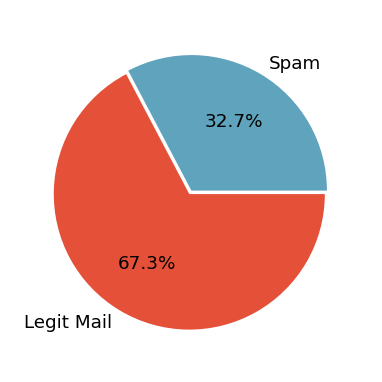

In [119]:
category_names = ['Spam','Legit Mail']
sizes = [amount_of_spam,amount_of_ham]
custom_colours = ['#60a3bc','#e55039']
plt.figure(figsize=(2,2),dpi=220)
plt.pie(sizes,labels = category_names,textprops={'fontsize':6},autopct='%1.1f%%',colors=custom_colours,explode=[0,0.03])
#draw ciricle
#centre_circle = plt.Circle((0,0),radius=0.6,fc='white')
#plt.gca().add_artist(centre_circle)
plt.show()

#NLP

Text Preprocessing:

#Converting to lower case 
#Tokenisisng 
#Removing Stop words
#Strippin out HTML tags 
#Word Stemmming